In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import re

In [2]:
def read_csv(path: str):
    """
    Funcao responsavel por realizar a leitura de um dataset em formato csv

    Parameters:
    path: Arquivo csv contendo os dados

    Returns: 
    df: DataFrame contendo os dados já lidos 
    """
    df = pd.read_csv(path, low_memory=True, dtype=str)
    if "votos_cantidad" in df.columns:
        df["votos_cantidad"] = df["votos_cantidad"].astype("int32")

    return df

In [3]:

# Dicionário de normalizações 
normalizacoes = {
    "JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "HACEMOS": "HACEMOS POR NUESTRO PAIS",
    "FRENTE DE IZQUIERDA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "FRENTE DE TODOS": "FRENTE DE TODOS",
    "ARI": "COALICION CIVICA - (ARI)",
    "PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "FE": "PARTIDO FE",
    "FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "CAMBIEMOS": "CAMBIEMOS",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES": "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES",
    "FRENTE PROGRESISTA CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "ALIANZA PROGRESISTA": "PROGRESISTAS",
    "NUEVA ALTERNATIVA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "1PAIS": "1PAIS",
    "UNIDAD CIUDADANA": "UNIDAD CIUDADANA",
    "ENCUENTRO POR CORRIENTES": "ENCUENTRO POR CORRIENTES",
    "FRENTE JUSTICIALISTA": "FRENTE JUSTICIALISTA",
    "JUNTOS": "JUNTOS POR EL CAMBIO",
    "UNION POR LA PATRIA": "UNION POR LA PATRIA",

    "UNION POR LA PATRIA": "UNION POR LA PATRIA",
    "FRENTE CIVICO POR SANTIAGO": "UNION POR LA PATRIA",
    "MAS PARA ENTRE RIOS": "UNION POR LA PATRIA",
    "FRENTE RENOVADOR DE LA CONCORDIA – INNOVACION FEDERAL": "UNION POR LA PATRIA",
    "UNION POR SAN LUIS": "UNION POR LA PATRIA",
    "FRENTE RENOVADOR": "UNION POR LA PATRIA",

    "LA LIBERTAD AVANZA": "LA LIBERTAD AVANZA",
    "AHORA PATRIA": "LA LIBERTAD AVANZA",
    "FUERZA REPUBLICANA": "LA LIBERTAD AVANZA",
    "PARTIDO RENOVADOR FEDERAL": "LA LIBERTAD AVANZA",
    "ARRIBA NEUQUEN": "LA LIBERTAD AVANZA",
    "PARTIDO FE": "LA LIBERTAD AVANZA",
    "REPUBLICANOS UNIDOS": "LA LIBERTAD AVANZA",

    "JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "FRENTE CAMBIA MENDOZA": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR ENTRE RIOS": "JUNTOS POR EL CAMBIO",
    "ECO + VAMOS CORRIENTES": "JUNTOS POR EL CAMBIO",
    "FRENTE CAMBIA JUJUY": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO CHUBUT": "JUNTOS POR EL CAMBIO",
    "CAMBIA SANTA CRUZ": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO TIERRA DEL FUEGO": "JUNTOS POR EL CAMBIO",

    "HACEMOS POR NUESTRO PAIS": "HACEMOS POR NUESTRO PAIS",
    "LA FUERZA DE SANTA FE": "HACEMOS POR NUESTRO PAIS",
    "PARTIDO AUTONOMISTA": "HACEMOS POR NUESTRO PAIS",
    "PARTIDO DEMOCRATA CRISTIANO": "HACEMOS POR NUESTRO PAIS",
    "PARTIDO UNION Y LIBERTAD": "HACEMOS POR NUESTRO PAIS",

    "JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "JUNTOS": "JUNTOS POR EL CAMBIO",
    "FRENTE CAMBIA MENDOZA": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR ENTRE RIOS": "JUNTOS POR EL CAMBIO",
    "ECO + VAMOS CORRIENTES": "JUNTOS POR EL CAMBIO",
    "CHACO CAMBIA + JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "FRENTE CAMBIA JUJUY": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO +": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR FORMOSA LIBRE": "JUNTOS POR EL CAMBIO",
    "UNIDOS POR SAN LUIS": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO CHUBUT": "JUNTOS POR EL CAMBIO",
    "CAMBIA NEUQUEN": "JUNTOS POR EL CAMBIO",
    "CAMBIA SANTA CRUZ": "JUNTOS POR EL CAMBIO",
    "COALICION CIVICA - (ARI)": "JUNTOS POR EL CAMBIO",
    "VAMOS LA RIOJA": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO TIERRA DEL FUEGO": "JUNTOS POR EL CAMBIO",
    "UNION CIVICA RADICAL": "JUNTOS POR EL CAMBIO",
    "UNIDOS": "JUNTOS POR EL CAMBIO",

    "FRENTE DE TODOS": "FRENTE DE TODOS",
    "FRENTE CIVICO POR SANTIAGO": "FRENTE DE TODOS",
    "FUERZA SAN LUIS": "FRENTE DE TODOS",
    "FRENTE RENOVADOR": "FRENTE DE TODOS",
    "COMPROMISO FEDERAL": "FRENTE DE TODOS",
    "TODOS UNIDOS": "FRENTE DE TODOS",

    "HACEMOS POR CORDOBA": "TERCERA VIA",
    "VAMOS CON VOS": "TERCERA VIA",
    "FRENTE AMPLIO PROGRESISTA": "TERCERA VIA",
    "MOVIMIENTO LIBRES DEL SUR": "TERCERA VIA",
    "PARTIDO SOCIALISTA": "TERCERA VIA",
    "FRENTE AMPLIO POR TUCUMAN": "TERCERA VIA",
    "CONSENSO ISCHIGUALASTO": "TERCERA VIA ",
    "PARTIDO FE": "TERCERA VIA",
    "FRENTE AMPLIO CATAMARQUENO": "TERCERA VIA",

    "AVANZA LIBERTAD": "LA LIBERTAD AVANZA",
    "LA LIBERTAD AVANZA": "LA LIBERTAD AVANZA",
    "FUERZA REPUBLICANA": "LA LIBERTAD AVANZA",
    "VAMOS MENDOCINOS": "LA LIBERTAD AVANZA",
    "PODEMOS": "LA LIBERTAD AVANZA",
    "PARTIDO CONSERVADOR POPULAR": "LA LIBERTAD AVANZA",
    "PARTIDO LIBERTAD, VALORES Y CAMBIO": "LA LIBERTAD AVANZA",
    "UNION DEL CENTRO DEMOCRATICO": "LA LIBERTAD AVANZA",
    "UNION POPULAR FEDERAL": "LA LIBERTAD AVANZA",
    "REPUBLICANOS UNIDOS": "LA LIBERTAD AVANZA",

    "FRENTE DE IZQUIERDA Y DE TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO DEL OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "NUEVA IZQUIERDA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "FRENTE DE TODOS": "FRENTE DE TODOS",
    "FRENTE CIVICO POR SANTIAGO": "FRENTE DE TODOS",
    "VAMOS TODOS A VIVIR MEJOR": "FRENTE DE TODOS",

    "JUNTOS POR EL CAMBIO": "JUNTOS POR EL CAMBIO",
    "CAMBIA MENDOZA": "JUNTOS POR EL CAMBIO",
    "ENCUENTRO POR CORRIENTES": "JUNTOS POR EL CAMBIO",
    "FRENTE AMPLIO FORMOSEÑO": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR LA RIOJA": "JUNTOS POR EL CAMBIO",
    "JUNTOS POR EL CAMBIO TIERRA DEL FUEGO": "JUNTOS POR EL CAMBIO",

    "CONSENSO FEDERAL": "CONSENSO FEDERAL",
    "ALIANZA HACEMOS POR CORDOBA": "CONSENSO FEDERAL",
    "PARTIDO SOCIALISTA": "CONSENSO FEDERAL",
    "UNION POR SALTA": "CONSENSO FEDERAL",
    "PROTECTORA FUERZA POLITICA": "CONSENSO FEDERAL",
    "GENERACION PARA UN ENCUENTRO NACIONAL": "CONSENSO FEDERAL",
    "MOVIMIENTO POLO SOCIAL": "CONSENSO FEDERAL",
    "MOVIMIENTO LIBRES DEL SUR": "CONSENSO FEDERAL",
    "FRENTE RENOVADOR AUTENTICO": "CONSENSO FEDERAL",

    "FRENTE DE IZQUIERDA Y DE TRABAJADORES": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES – NUEVA IZQUIERDA": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE TRABAJADORES",

    "ALIANZA FRENTE RENOVADOR DE LA CONCORDIA": "FRENTE NOS",
    "FUERZA REPUBLICANA": "FRENTE NOS",
    "ENCUENTRO VECINAL CORDOBA": "FRENTE NOS",
    "PARTIDO CONSERVADOR POPULAR": "FRENTE NOS",
    "ACCION CHAQUENA": "FRENTE NOS",
    "PARTIDO CIUDADANOS A GOBERNAR": "FRENTE NOS",
    #2015
    "CAMBIEMOS BUENOS AIRES": "CAMBIEMOS",
    "CAMBIEMOS": "CAMBIEMOS",
    "VAMOS JUNTOS": "CAMBIEMOS",
    "CAMBIEMOS PARA EL BICENTENARIO": "CAMBIEMOS",
    "ENCUENTRO POR CORRIENTES": "CAMBIEMOS",
    "CAMBIEMOS - PARTIDO IDENTIDAD SALTENA": "CAMBIEMOS",
    "FRENTE JUJENO CAMBIEMOS": "CAMBIEMOS",
    "CAMBIEMOS SAN JUAN": "CAMBIEMOS",
    "AVANZAR Y CAMBIEMOS POR SAN LUIS": "CAMBIEMOS",
    "CAMBIEMOS RIO NEGRO": "CAMBIEMOS",
    "FRENTE AMPLIO FORMOSENO - CAMBIEMOS": "CAMBIEMOS",
    "FRENTE CAMBIEMOS LA PAMPA": "CAMBIEMOS",
    "CAMBIEMOS CHUBUT": "CAMBIEMOS",
    "CAMBIEMOS - FUERZA CIVICA RIOJANA": "CAMBIEMOS",
    "FRENTE CIVICO Y SOCIAL - CAMBIEMOS": "CAMBIEMOS",
    "UNION PARA VIVIR MEJOR - CAMBIEMOS": "CAMBIEMOS",
    "CAMBIEMOS TIERRA DEL FUEGO": "CAMBIEMOS",

    "UNIDAD CIUDADANA": "UNIDAD CIUDADANA",
    "FRENTE PARA LA VICTORIA": "UNIDAD CIUDADANA",
    "UNIDAD PORTENA": "UNIDAD CIUDADANA",
    "FRENTE CIVICO POR SANTIAGO": "UNIDAD CIUDADANA",
    "CORDOBA CIUDADANA": "UNIDAD CIUDADANA",
    "FRENTE CIUDADANO PARA LA VICTORIA": "UNIDAD CIUDADANA",
    "FRENTE UNIDAD JUSTICIALISTA SAN LUIS": "UNIDAD CIUDADANA",
    "PARTIDO AGRARIO Y SOCIAL": "UNIDAD CIUDADANA",
    "UNIDAD CIUDADANA PARA LA VICTORIA": "UNIDAD CIUDADANA",
    "FRENTE NEUQUINO": "UNIDAD CIUDADANA",
    "FRENTE CIUDADANO Y SOCIAL": "UNIDAD CIUDADANA",
    "FRENTE POPULAR PARA LA LIBERACION": "UNIDAD CIUDADANA",
    "ALTERNATIVA POPULAR RIOJANA": "UNIDAD CIUDADANA",
    "FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "FRENTE CIVICO PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",

    "CAMBIEMOS": "CAMBIEMOS",
    "CAMBIEMOS BUENOS AIRES": "CAMBIEMOS",
    "CAMBIEMOS MENDOZA": "CAMBIEMOS",
    "CAMBIA JUJUY": "CAMBIEMOS",
    "ENCUENTRO POR CORRIENTES": "CAMBIEMOS",
    "CAMBIEMOS SALTA": "CAMBIEMOS",
    "CAMBIEMOS RIO NEGRO": "CAMBIEMOS",
    "FRENTE AMPLIO FORMOSENO": "CAMBIEMOS",
    "FRENTE CIVICO Y SOCIAL": "CAMBIEMOS",
    "FRENTE PAMPEANO CIVICO Y SOCIAL": "CAMBIEMOS",
    "CAMBIEMOS CHUBUT": "CAMBIEMOS",
    "CAMBIEMOS TIERRA DEL FUEGO": "CAMBIEMOS",

    "UNIDOS POR UNA NUEVA ALTERNATIVA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "UNION POR CORDOBA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "FRENTE RENOVADOR FEDERAL DE LA ESPERANZA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "COMPROMISO POR SAN JUAN": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "MOVIMIENTO DE PARTICIPACION CIUDADANA": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "UNION POPULAR": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "FRENTE UNIDOS": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "PUEBLO NUEVO": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "FRENTE TERCERA POSICION": "UNIDOS POR UNA NUEVA ALTERNATIVA",
    "FRENTE RENOVADOR AUTENTICO": "UNIDOS POR UNA NUEVA ALTERNATIVA",

    "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES",

    "PROGRESISTAS": "PROGRESISTAS",
    "FRENTE PROGRESISTA CIVICO Y SOCIAL": "PROGRESISTAS",
    "PARTIDO SOCIALISTA": "PROGRESISTAS",
    "MOVIMIENTO POLO SOCIAL – LA TERCERA POSICION DE LA GENTE": "PROGRESISTAS",
    "PARTIDO GEN": "PROGRESISTAS",

    "COMPROMISO FEDERAL": "COMPROMISO FEDERAL",
    "PARTIDO ES POSIBLE": "COMPROMISO FEDERAL",
    "FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "FRENTE CIVICO POR SANTIAGO": "FRENTE PARA LA VICTORIA",
    "PARTIDO JUSTICIALISTA DE LA PROVINCIA DE SALTA": "FRENTE PARA LA VICTORIA",
    "PARTIDO DE LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "MOVIMIENTO SOLIDARIO POPULAR": "FRENTE PARA LA VICTORIA",
    "ENCUENTRO DEMOCRATICO PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",

    "FRENTE PROGRESISTA CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "UNION CIVICA RADICAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE AMPLIO UNEN": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "ACUERDO CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "ENCUENTRO POR CORRIENTES": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "UNION POR CHACO": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE JUJENO": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE AMPLIO FORMOSENO": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FUERZA CIVICA RIOJANA": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE PROGRESISTA": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE PAMPEANO CIVICO Y SOCIAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "COALICION CIVICA - (ARI)": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "UNION PARA VIVIR MEJOR": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "COMPROMISO CIVICO NEUQUINO": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "PARTIDO SOCIALISTA": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE PROGRESISTA CIVICO Y SOCIAL – COALICION CIVICA - (ARI)": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "FRENTE PROGRESISTA SUR": "FRENTE PROGRESISTA CIVICO Y SOCIAL",
    "GENERACION PARA UN ENCUENTRO NACIONAL": "FRENTE PROGRESISTA CIVICO Y SOCIAL",

    "FRENTE RENOVADOR": "FRENTE RENOVADOR",
    "CAMBIO POPULAR": "FRENTE RENOVADOR",
    "FRENTE TERCERA POSICION – UNIDAD CATAMARQUENA": "FRENTE RENOVADOR",
    "SANTAFESINO CIEN POR CIENTO": "FRENTE RENOVADOR",
    "PARTIDO LABORISTA DE LA INDEPENDENCIA": "FRENTE RENOVADOR",

    "UNION PRO": "PROPUESTA REPUBLICANA",
    "UNION PRO SANTA FE FEDERAL": "PROPUESTA REPUBLICANA",
    "UNION POR ENTRE RIOS": "PROPUESTA REPUBLICANA",
    "FRENTE POPULAR SALTENIO": "PROPUESTA REPUBLICANA",
    "FRENTE UNIDOS": "PROPUESTA REPUBLICANA",
    "PARTIDO DEMOCRATA – PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "PROPUESTA FEDERAL": "PROPUESTA REPUBLICANA",
    "PROPUESTA REPUBLICANA": "PROPUESTA REPUBLICANA",
    "NUEVO PACTO FEDERAL": "PROPUESTA REPUBLICANA",

    "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES",
    "IZQUIERDA POR UNA OPCION SOCIALISTA": "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES",
    "PARTIDO DE LOS TRABAJADORES SOCIALISTAS": "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES",

    "UNIDOS POR LA LIBERTAD Y EL TRABAJO": "PARTIDO FE",
    "FRENTE RENOVADOR DE LA CONCORDIA": "PARTIDO FE",
    "COMPROMISO FEDERAL": "PARTIDO FE",
    "PARTIDO ACCION CHUBUTENSE": "PARTIDO FE",
    "UNION CON FE": "PARTIDO FE",
    "PARTIDO FE": "PARTIDO FE",

    "MOVIMIENTO POPULAR NEUQUINO": "NUEVA IZQUIERDA",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES – NUEVA IZQUIERDA": "NUEVA IZQUIERDA",
    "ALTERNATIVA POPULAR": "NUEVA IZQUIERDA",
    "FRENTE DEL PUEBLO": "NUEVA IZQUIERDA",
    "FRENTE PARA LA VICTORIA": "FRENTE PARA LA VICTORIA",
    "FRENTE CIVICO POR SANTIAGO": "FRENTE PARA LA VICTORIA",
    "FRENTE RENOVADOR DE LA CONCORDIA": "FRENTE PARA LA VICTORIA",
    "PARTIDO HUMANISTA": "FRENTE PARA LA VICTORIA",
    "FRENTE PARA LA VICTORIA RIOJANA": "FRENTE PARA LA VICTORIA",
    "FRENTE POPULAR RIOJANO": "FRENTE PARA LA VICTORIA",
    "PARTIDO JUSTICIALISTA": "FRENTE PARA LA VICTORIA",

    "FRENTE AMPLIO PROGRESISTA": "FRENTE AMPLIO PROGRESISTA",
    "PARTIDO SOCIALISTA": "FRENTE AMPLIO PROGRESISTA",
    "GENERACION PARA UN ENCUENTRO NACIONAL": "FRENTE AMPLIO PROGRESISTA",
    "MOVIMIENTO LIBRES DEL SUR": "FRENTE AMPLIO PROGRESISTA",

    "UNION PARA EL DESARROLLO SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",
    "UNION CIVICA RADICAL": "UNION PARA EL DESARROLLO SOCIAL",
    "FRENTE CIVICO FEDERAL – UNION PARA EL DESARROLLO SOCIAL MENDOZA": "UNION PARA EL DESARROLLO SOCIAL",
    "FRENTE PAMPEANO CIVICO Y SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",
    "FRENTE CIVICO Y SOCIAL": "UNION PARA EL DESARROLLO SOCIAL",

    "FRENTE POPULAR": "FRENTE POPULAR – PROPUESTA REPUBLICANA",
    "PROPUESTA REPUBLICANA": "FRENTE POPULAR – PROPUESTA REPUBLICANA",
    "UNION POPULAR": "FRENTE POPULAR – PROPUESTA REPUBLICANA",
    "FRENTE SALTENIO": "FRENTE POPULAR – PROPUESTA REPUBLICANA",
    "PARTIDO INDEPENDIENTE DEL CHUBUT": "FRENTE POPULAR – PROPUESTA REPUBLICANA",
    "FRENTE POPULAR UNION PRO": "FRENTE POPULAR – PROPUESTA REPUBLICANA",
    "FRENTE PRIMERO JUJUY": "FRENTE POPULAR – PROPUESTA REPUBLICANA",
    "CAMBIO POPULAR TUCUMANO": "FRENTE POPULAR – PROPUESTA REPUBLICANA",
    "MOVIMIENTO INDEPENDIENTE RENOVADOR": "FRENTE POPULAR – PROPUESTA REPUBLICANA",
    "PARTIDO FORTALEZA": "FRENTE POPULAR – PROPUESTA REPUBLICANA",
    "ACUERDO REPUBLICANO FEDERAL": "FRENTE POPULAR – PROPUESTA REPUBLICANA",

    "COMPROMISO FEDERAL": "COMPROMISO FEDERAL",
    "UNION PROVINCIAL": "COMPROMISO FEDERAL",
    "PARTIDO ES POSIBLE": "COMPROMISO FEDERAL",

    "COALICION CIVICA - (ARI)": "COALICION CIVICA - (ARI)",
    "MOVIMIENTO DE PARTICIPACION CIUDADANA": "COALICION CIVICA - (ARI)",
    "UNION POR LA LIBERTAD": "COALICION CIVICA - (ARI)",

    "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES": "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES",
    "PARTIDO OBRERO": "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES",
    "IZQUIERDA DEL TRABAJADOR POR EL SOCIALISMO": "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES",
    "IZQUIERDA POR UNA OPCION SOCIALISTA": "FRENTE DE IZQUIERDA Y DE LOS TRABAJADORES",

    "MOVIMIENTO POPULAR NEUQUINO": "MOVIMIENTO PROYECTO SUR",
    "MOVIMIENTO INDEPENDIENTE DE JUBILADOS Y DESOCUPADOS": "MOVIMIENTO PROYECTO SUR",
    "PARTIDO POPULAR DE LA RECONSTRUCCION": "MOVIMIENTO PROYECTO SUR",
    "PROYECTO SUR": "MOVIMIENTO PROYECTO SUR",
    "MOVIMIENTO SOCIALISTA DE LOS TRABAJADORES – NUEVA IZQUIERDA": "MOVIMIENTO PROYECTO SUR",
    "FRENTE ENCUENTRO SUR": "MOVIMIENTO PROYECTO SUR",

}

def normalize_name(name: str) -> str:
    """Normaliza o nome de partidos/coalizões com prioridade para correspondências exatas."""
    if pd.isna(name):
        return name
    
    # Limpeza do nome
    processed_name = unicodedata.normalize('NFD', name)
    processed_name = ''.join(c for c in processed_name if unicodedata.category(c) != 'Mn')
    processed_name = processed_name.upper().strip()

    if processed_name in normalizacoes:
        return normalizacoes[processed_name]

    # Normalização específica
    for chave, valor in normalizacoes.items():
        if chave in processed_name:
            return valor

    # Limpeza final de espaços
    final_name = re.sub(r'\s+', ' ', processed_name)
    return final_name.strip()     

In [4]:
def plot_votos(df: pd.DataFrame, cargo:str, ano:str):
    """
    Plota um gráfico de barras com os votos agrupados por partido para um determinado cargo.

    Parameters:
    df: DataFrame contendo os dados
    cargo: Cargo a ser utilizado como filtro (string)
    """

    # Filtrando para apenas Presidente
    df_presidente = df[df["cargo_nombre"] == cargo]

    # Agrupando votos para Presidente por Partido
    votos_por_partido = (
        df_presidente.groupby("agrupacion_nombre")["votos_cantidad"]
        .sum()
        .sort_values(ascending=False)
        .head(10))

    # Exibição do gráfico
    plt.figure(figsize=(10,6))
    votos_por_partido.plot(kind="bar", color="#233C49")
    plt.title(f"Votos para {cargo} por Partido - {ano}")
    plt.ylabel("Quantidade de votos")
    plt.xlabel("Partido", fontsize=8)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

In [5]:
#Leitura do CSV de 2023 contendo os resultados eleitorais provisorios
df_2023 = read_csv("data/ResultadoElectorales_2023_Generales.csv")
df_2023["agrupacion_nombre"] = df_2023["agrupacion_nombre"].apply(normalize_name)

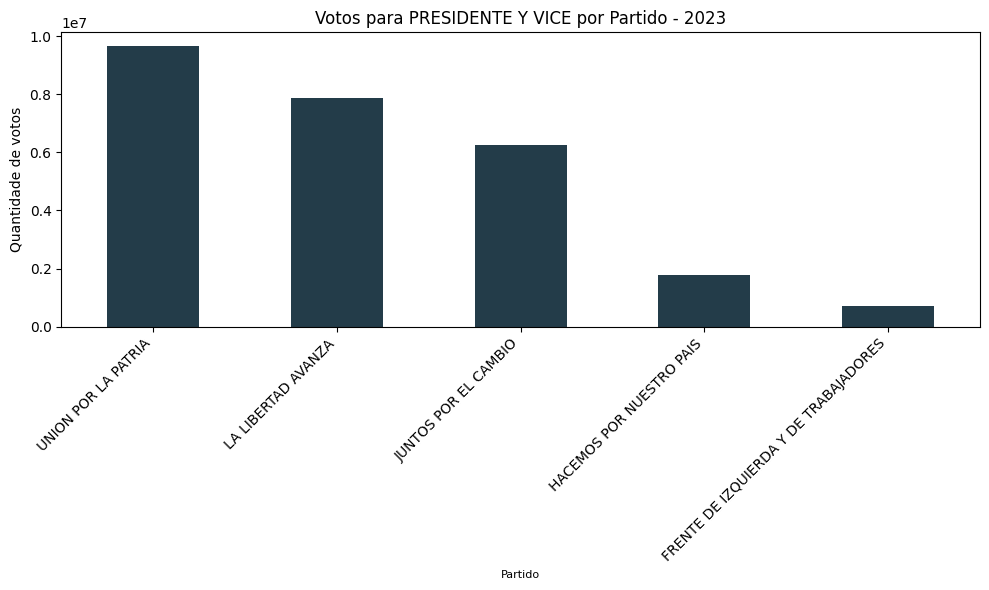

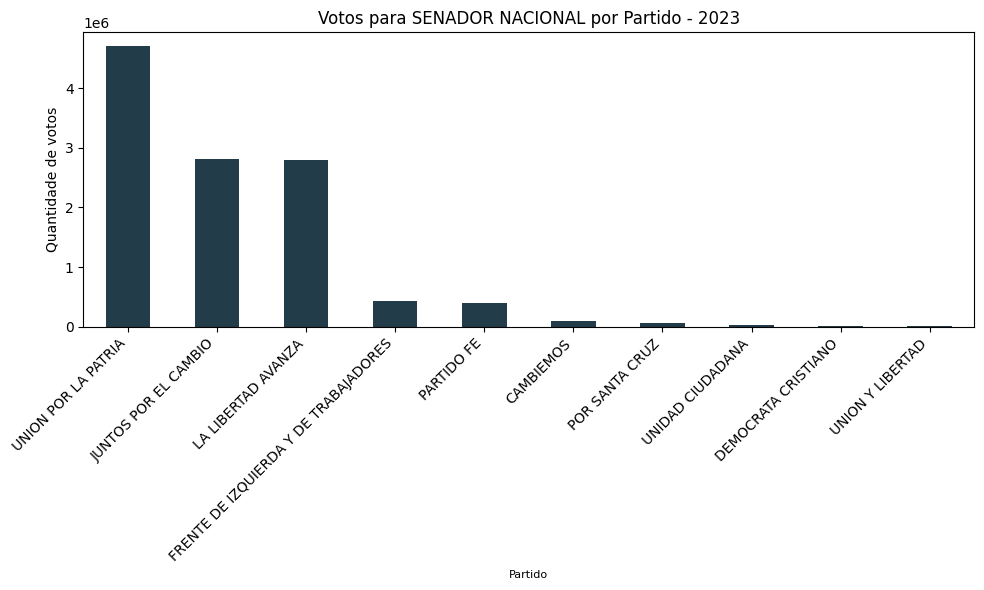

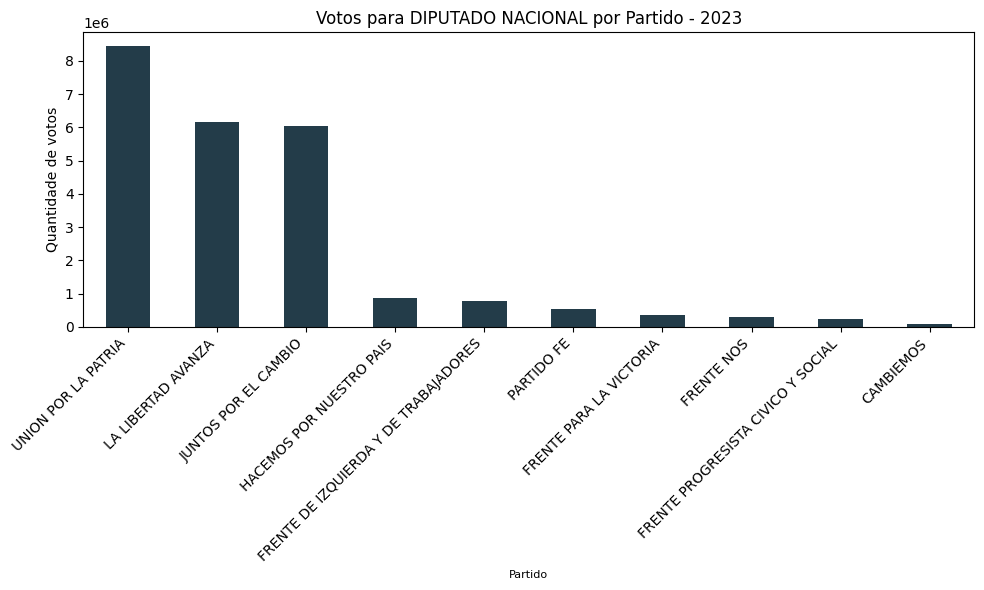

In [6]:
plot_votos(df_2023,"PRESIDENTE Y VICE", 2023)
plot_votos(df_2023,"SENADOR NACIONAL", 2023)
plot_votos(df_2023,"DIPUTADO NACIONAL", 2023)

In [7]:
#Leitura do CSV de 2021 contendo os resultados eleitorais provisorios
df_2021 = read_csv("data\ResultadosElectorales_2021_Generales.csv")
df_2021["agrupacion_nombre"] = df_2021["agrupacion_nombre"].apply(normalize_name)

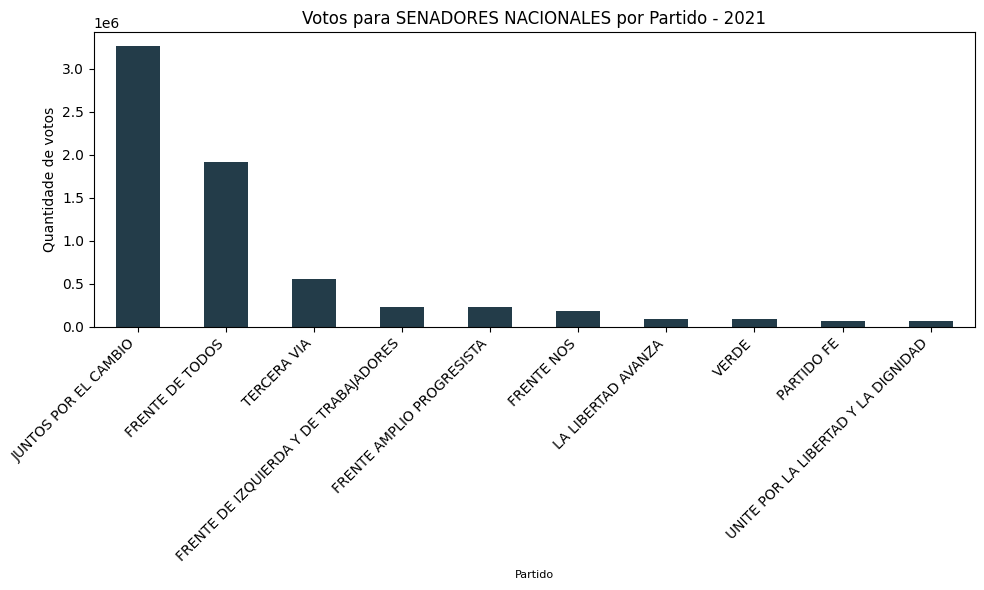

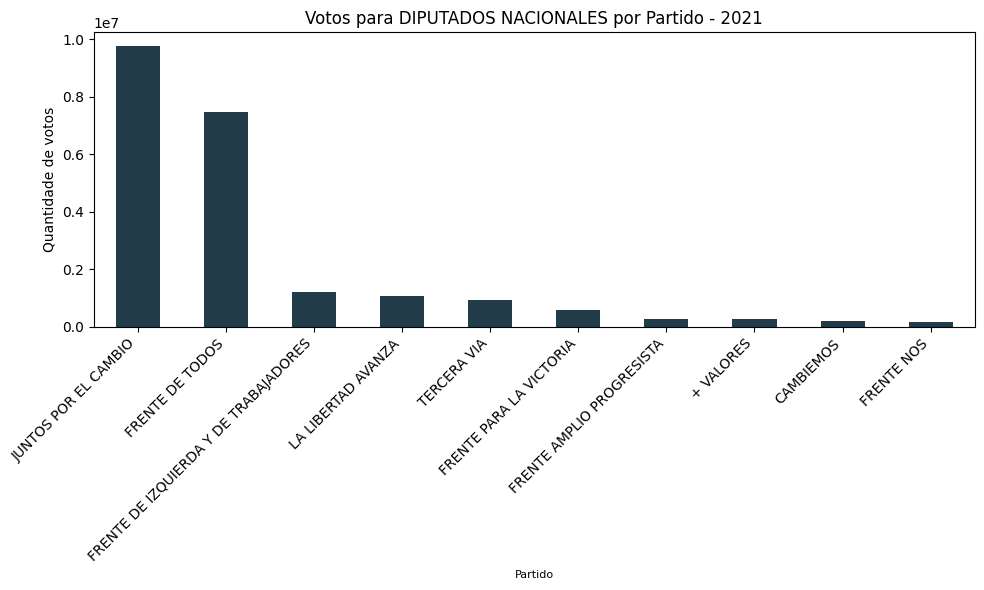

In [8]:
plot_votos(df_2021,"SENADORES NACIONALES", 2021)
plot_votos(df_2021,"DIPUTADOS NACIONALES", 2021)

In [9]:
#Leitura do CSV de 2019 contendo os resultados eleitorais provisorios
df_2019 = read_csv("data\ResultadosElectorales_2019_Generales.csv")
df_2019['agrupacion_nombre'] = df_2019['agrupacion_nombre'].apply(normalize_name)

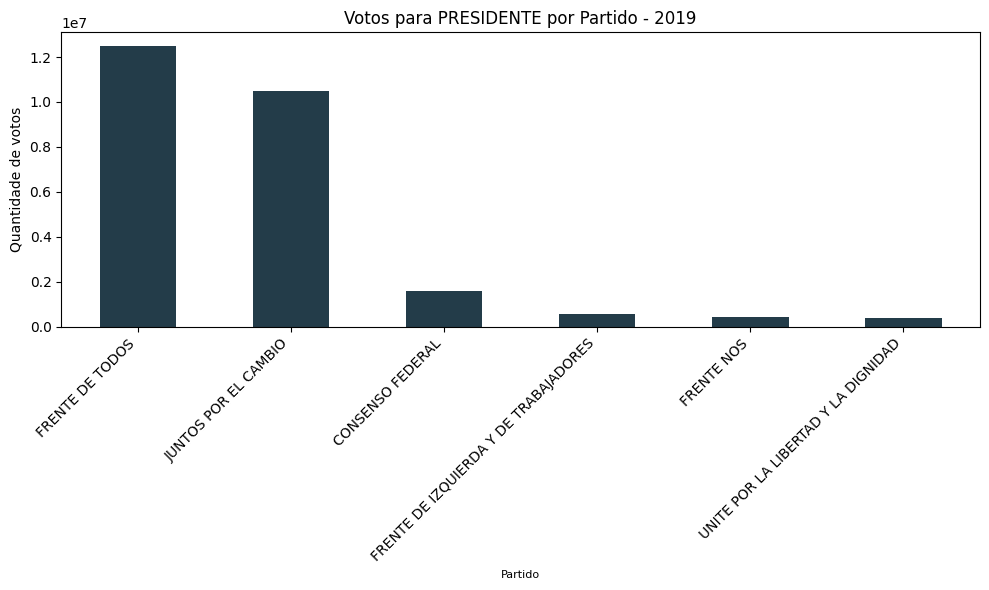

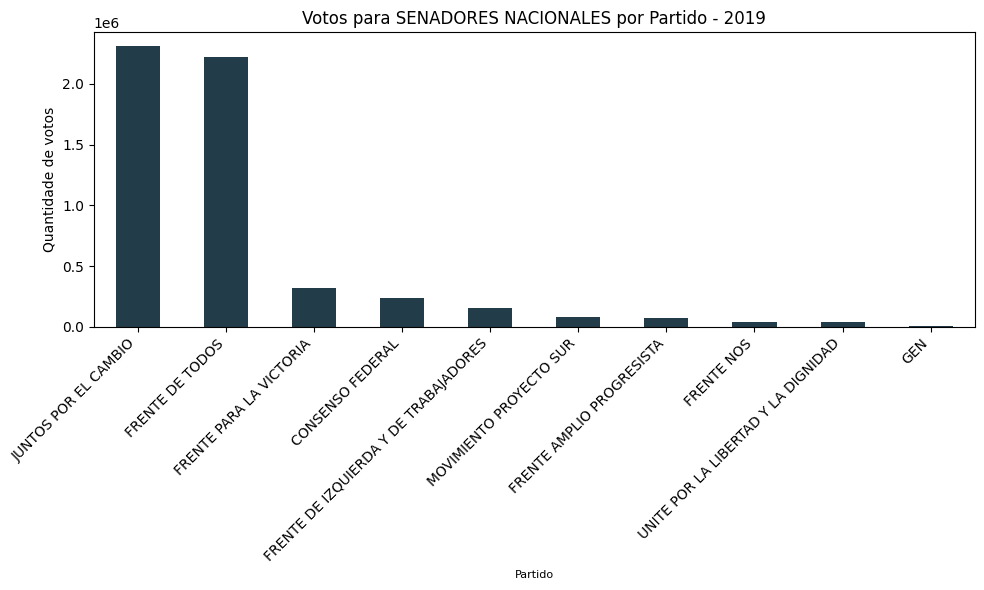

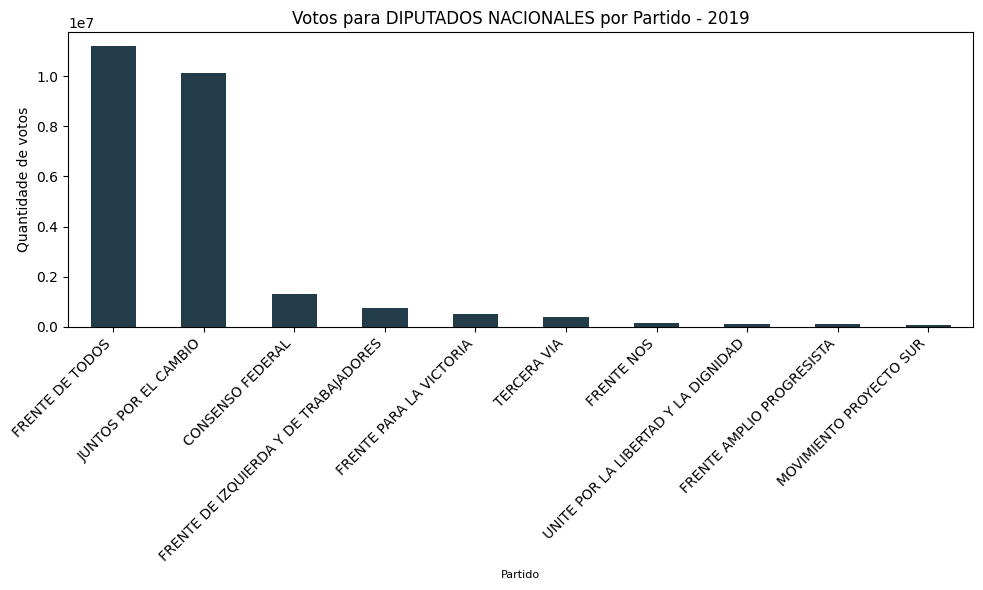

In [10]:
plot_votos(df_2019,"PRESIDENTE", 2019)
plot_votos(df_2019,"SENADORES NACIONALES", 2019)
plot_votos(df_2019,"DIPUTADOS NACIONALES", 2019)

In [11]:
#Leitura do CSV de 2017 contendo os resultados eleitorais provisorios
df_2017 = read_csv("data\ResultadosElectorales2017.csv")
df_2017['agrupacion_nombre'] = df_2017['agrupacion_nombre'].apply(normalize_name)

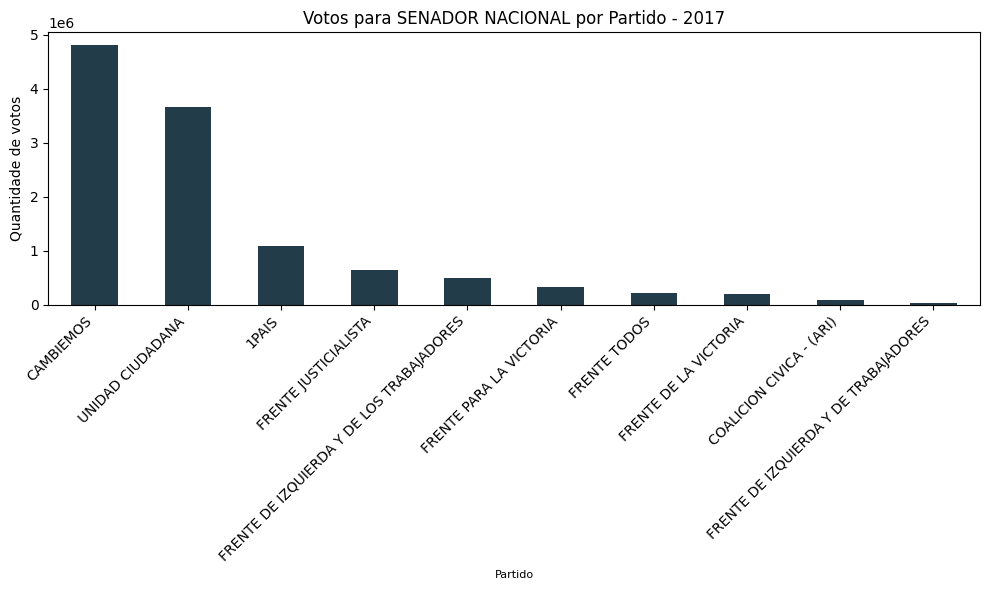

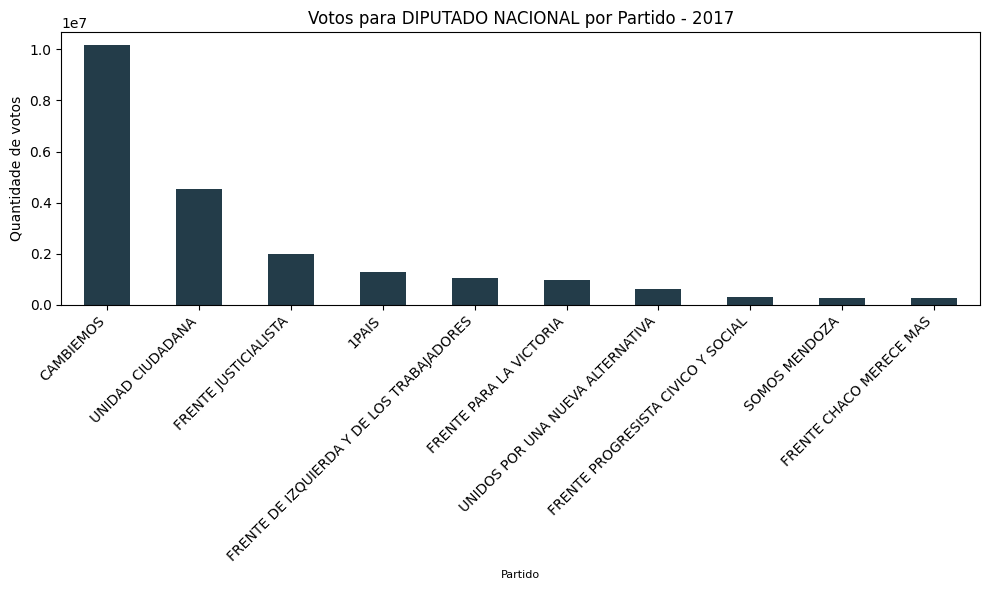

In [12]:
plot_votos(df_2017,"SENADOR NACIONAL", 2017)
plot_votos(df_2017,"DIPUTADO NACIONAL", 2017)

In [13]:
#Leitura do CSV de 2015 contendo os resultados eleitorais provisorios
df_2015 = read_csv("data\ResultadosElectorales2015.csv")
df_2015['agrupacion_nombre'] = df_2015['agrupacion_nombre'].apply(normalize_name)

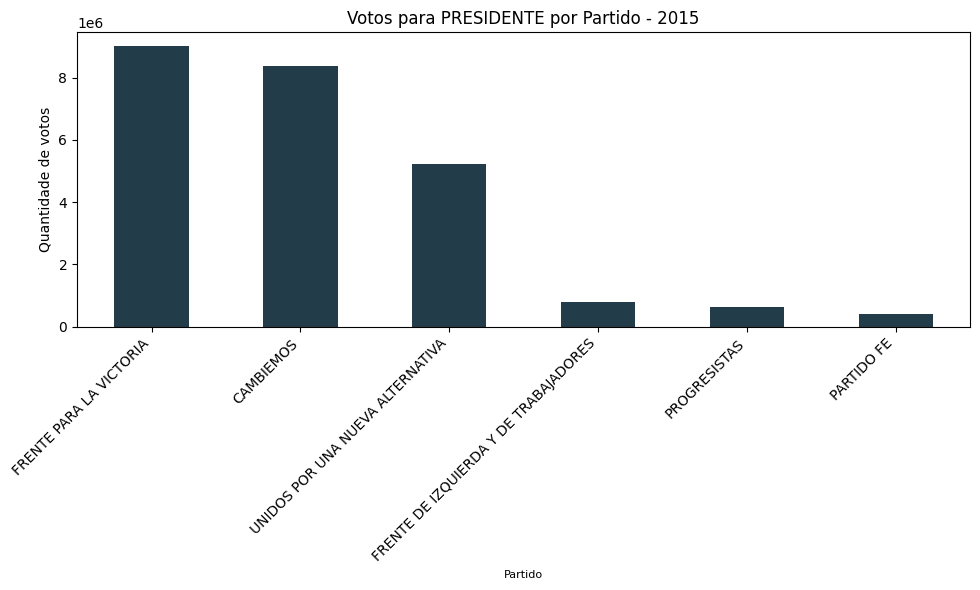

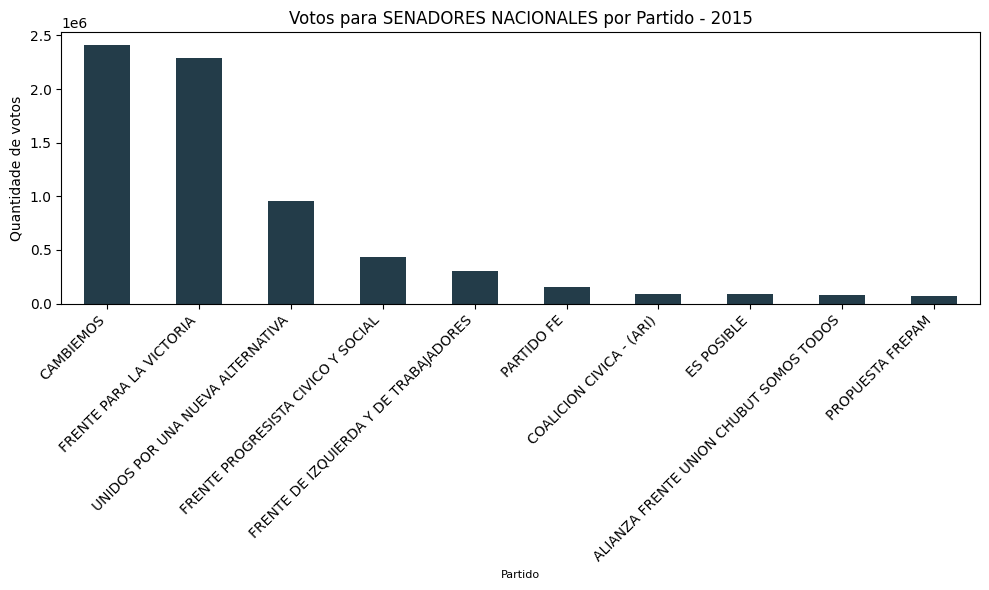

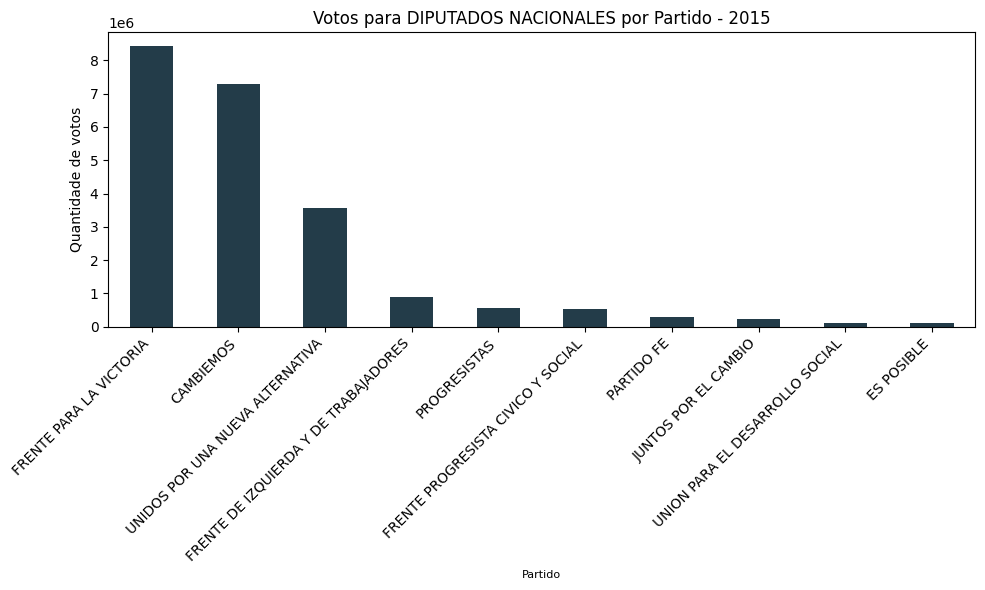

In [14]:
plot_votos(df_2015,"PRESIDENTE", 2015)
plot_votos(df_2015,"SENADORES NACIONALES", 2015)
plot_votos(df_2015,"DIPUTADOS NACIONALES", 2015)

In [15]:
#Leitura do CSV de 2013 contendo os resultados eleitorais provisorios
df_2013 = read_csv("data\ResultadosElectorales2013.csv")
df_2013['agrupacion_nombre'] = df_2013['agrupacion_nombre'].apply(normalize_name)

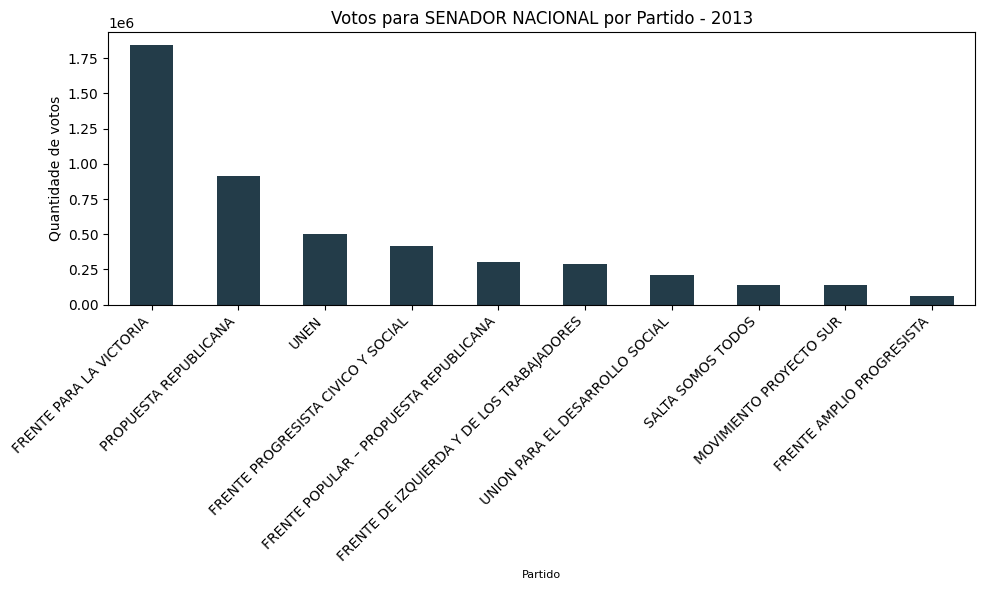

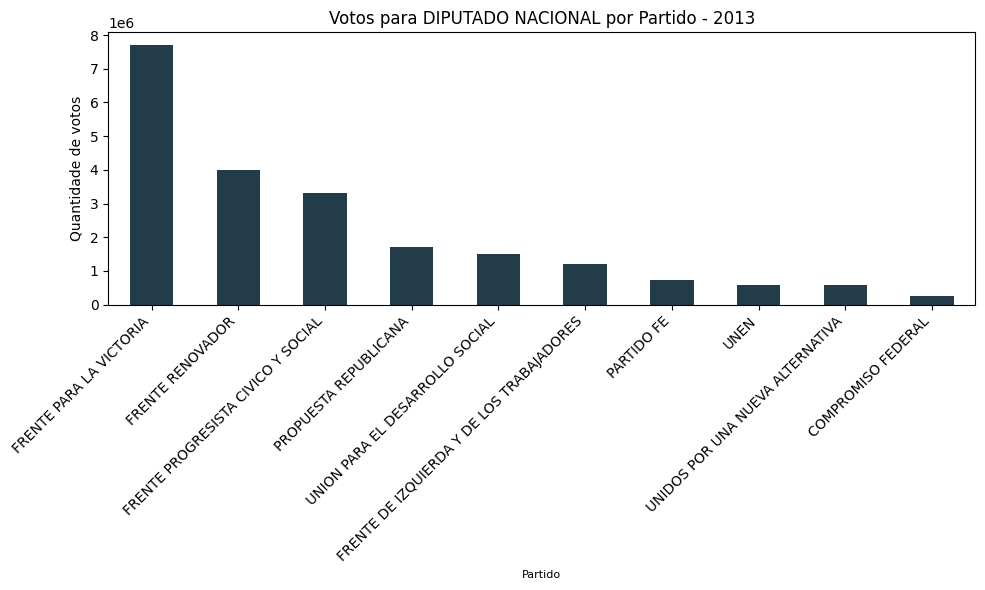

In [16]:
plot_votos(df_2013,"SENADOR NACIONAL", 2013)
plot_votos(df_2013,"DIPUTADO NACIONAL", 2013)

In [17]:
df_ipp = read_csv("data\PartidosNacionaisArgentinaIPP.csv")
df_ipp['Partidos/Coalizacoes Nacionais'] = df_ipp['Partidos/Coalizacoes Nacionais'].apply(normalize_name)

In [18]:
def calcular_ipp_eleicao(df_votos: pd.DataFrame, df_ipp: pd.DataFrame, filtro_cargo: str ,coluna_partido="agrupacion_nombre"):
    # Filtra apenas a eleicao e o cargo desejado
    df_cargo = df_votos[df_votos["cargo_nombre"] == filtro_cargo].copy()

    # Merge para associar o IPP de cada partido
    df_merge = df_cargo.merge(df_ipp, left_on=coluna_partido, right_on="Partidos/Coalizacoes Nacionais", how='left')

    # Renomeia a col IPP
    df_merge.rename(columns={"IPP (Índice de Posição Política)": "IPP"}, inplace=True)

    # Converte para numérico 
    df_merge["IPP"] = pd.to_numeric(df_merge["IPP"], errors="coerce")
    df_merge["votos_cantidad"] = pd.to_numeric(df_merge["votos_cantidad"], errors="coerce")
    
    # Calcula peso IPP * votos
    df_merge["IPP_ponderado"] = df_merge["IPP"] * df_merge["votos_cantidad"]

   # Total de votos válidos com IPP
    total_votos = df_merge["votos_cantidad"].sum()

    # Média ponderada
    ipp_total = df_merge["IPP_ponderado"].sum() / total_votos if total_votos > 0 else None

    return ipp_total, df_merge

In [19]:
anos_dfs_deputados = {
    2023: (df_2023, "DIPUTADO NACIONAL"),
    2021: (df_2021, "DIPUTADOS NACIONALES"),
    2019: (df_2019, "DIPUTADOS NACIONALES"),
    2017: (df_2017, "DIPUTADO NACIONAL"),
    2015: (df_2015, "DIPUTADOS NACIONALES"),
    2013: (df_2013, "DIPUTADO NACIONAL"),
}

anos_dfs_senadores= {
    2023: (df_2023, "SENADOR NACIONAL"),
    2021: (df_2021, "SENADORES NACIONALES"),
    2019: (df_2019, "SENADORES NACIONALES"),
    2017: (df_2017, "SENADOR NACIONAL"),
    2015: (df_2015, "SENADORES NACIONALES"),
    2013: (df_2013, "SENADOR NACIONAL"),
}
def exibir_ipp(dict_dep: dict, dict_sen:dict, df_ipp):
    resultados = {}
    # loop sobre o dicionario de deputados
    for ano, (df, cargo) in dict_dep.items():
        ipp_total_deputados, df_merge = calcular_ipp_eleicao(df, df_ipp, cargo)
        ipp_total_deputados = ipp_total_deputados
        resultados[ano] = (ipp_total_deputados, df_merge)
        print(f"IPP total da eleição para Deputados Nacionais {ano}: {ipp_total_deputados}")

    # loop sobre o dicionario de senadores
    for ano, (df, cargo) in dict_sen.items():
        ipp_total_senadores, df_merge = calcular_ipp_eleicao(df, df_ipp, cargo)
        ipp_total_senadores = ipp_total_senadores
        resultados[ano] = (ipp_total_senadores, df_merge)
        print(f"IPP total da eleição para Senadores Nacionais {ano}: {ipp_total_senadores}")
        

In [20]:
exibir_ipp(anos_dfs_deputados, anos_dfs_senadores, df_ipp=df_ipp)

IPP total da eleição para Deputados Nacionais 2023: 0.8188767920493831
IPP total da eleição para Deputados Nacionais 2021: 0.29153791336016005
IPP total da eleição para Deputados Nacionais 2019: 0.07566997868737516
IPP total da eleição para Deputados Nacionais 2017: -0.18660552690700785
IPP total da eleição para Deputados Nacionais 2015: -0.40045130300031573
IPP total da eleição para Deputados Nacionais 2013: -0.6054522178935543
IPP total da eleição para Senadores Nacionais 2023: 0.8080136072520002
IPP total da eleição para Senadores Nacionais 2021: 0.32858955328060885
IPP total da eleição para Senadores Nacionais 2019: 0.03440207375914725
IPP total da eleição para Senadores Nacionais 2017: -0.3738165993592196
IPP total da eleição para Senadores Nacionais 2015: -0.3457007749687176
IPP total da eleição para Senadores Nacionais 2013: -0.5742817144617245


In [21]:
# Dicionário com os IPPs calculados
ipps_deputados = {
    2023: 0.8188767920493831,
    2021: 0.29153791336016005,
    2019: 0.07566997868737516,
    2017: -0.18660552690700785,
    2015: -0.40045130300031573,
    2013: -0.6054522178935543
}

ipps_senadores = {
    2023: 0.8080136072520002,
    2021: 0.32858955328060885,
    2019: 0.03440207375914725,
    2017: -0.3738165993592196,
    2015: -0.3457007749687176,
    2013: -0.5742817144617245
}

# Criar grafico de barras
anos = [2013, 2015, 2017, 2019, 2021, 2023]
valores_deputados = list(ipps_deputados.get(ano, 0) for ano in anos)
valores_senadores = list(ipps_senadores.get(ano, 0) for ano in anos)

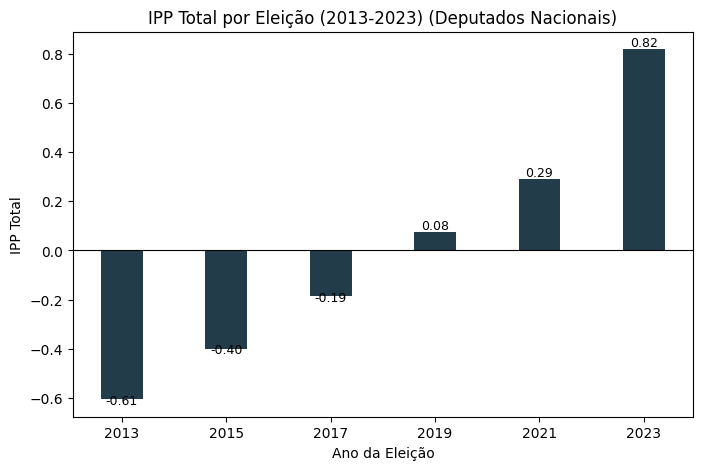

In [22]:
plt.figure(figsize=(8, 5))
plt.bar(anos, valores_deputados, color="#233C49")

plt.xlabel("Ano da Eleição")
plt.ylabel("IPP Total")
plt.title("IPP Total por Eleição (2013-2023) (Deputados Nacionais)")
plt.axhline(0, color="black", linewidth=0.8)

plt.xticks(anos)

# Mostrar valores acima das barras
for i, v in enumerate(valores_deputados):
    if anos[i] in ipps_deputados:
        plt.text(anos[i], v + 0.01 if v >= 0 else v - 0.02, f"{v:.2f}", 
                ha="center", fontsize=9)

plt.show()

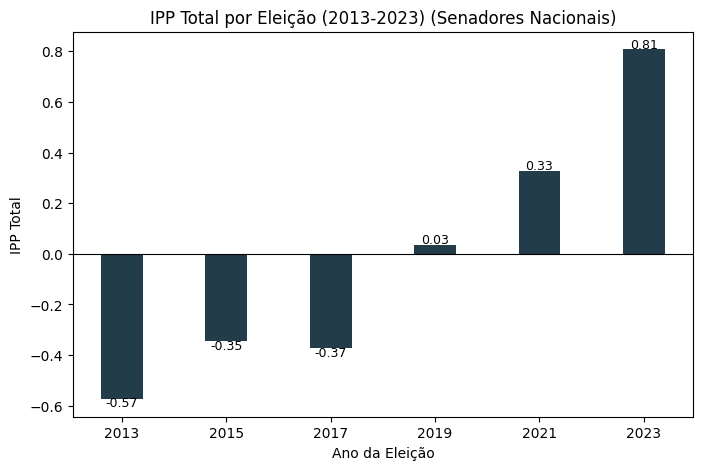

In [23]:
plt.figure(figsize=(8, 5))
plt.bar(anos, valores_senadores, color="#233C49")

plt.xlabel("Ano da Eleição")
plt.ylabel("IPP Total")
plt.title("IPP Total por Eleição (2013-2023) (Senadores Nacionais)")
plt.axhline(0, color="black", linewidth=0.8)

plt.xticks(anos)

# Mostrar valores acima das barras
for i, v in enumerate(valores_senadores):
    if anos[i] in ipps_senadores:
        plt.text(anos[i], v + 0.005 if v >= 0 else v - 0.03, f"{v:.2f}", 
                ha="center", fontsize=9)

plt.show()

Agora vamos analisar apenas para as coalizões, excluindo os partidos nacionais que foram mapeados.

In [24]:
df_ipp_coalizoes = read_csv("data\CoalizoesArgentinaIPP.csv")
df_ipp_coalizoes['Partidos/Coalizacoes Nacionais'] = df_ipp_coalizoes['Partidos/Coalizacoes Nacionais'].apply(normalize_name)

In [25]:
exibir_ipp(anos_dfs_deputados, anos_dfs_senadores, df_ipp=df_ipp_coalizoes)

IPP total da eleição para Deputados Nacionais 2023: 0.2632291993594647
IPP total da eleição para Deputados Nacionais 2021: -0.043686299073056246
IPP total da eleição para Deputados Nacionais 2019: -0.17936140357316493
IPP total da eleição para Deputados Nacionais 2017: -0.16492926820901163
IPP total da eleição para Deputados Nacionais 2015: -0.2699323828327801
IPP total da eleição para Deputados Nacionais 2013: -0.5461685829047095
IPP total da eleição para Senadores Nacionais 2023: 0.227408643877651
IPP total da eleição para Senadores Nacionais 2021: 0.0983950132502778
IPP total da eleição para Senadores Nacionais 2019: -0.18974039915800026
IPP total da eleição para Senadores Nacionais 2017: -0.3348439536058621
IPP total da eleição para Senadores Nacionais 2015: -0.23164426069817726
IPP total da eleição para Senadores Nacionais 2013: -0.41157920990107355


In [29]:
# Dicionário com os IPPs calculados
ipps_deputados_coalizoes = {
    2023: 0.2632291993594647,
    2021: -0.043686299073056246,
    2019: -0.17936140357316493,
    2017: -0.16492926820901163,
    2015: -0.2699323828327801,
    2013: -0.5461685829047095
}

ipps_senadores_coalizoes = {
    2023: 0.227408643877651,
    2021: 0.0983950132502778,
    2019: -0.18974039915800026,
    2017: -0.3348439536058621,
    2015: -0.23164426069817726,
    2013: -0.41157920990107355
}

# Criar grafico de barras
anos = [2013, 2015, 2017, 2019, 2021, 2023]
valores_deputados_coalizoes = list(ipps_deputados_coalizoes.get(ano, 0) for ano in anos)
valores_senadores_coalizoes = list(ipps_senadores_coalizoes.get(ano, 0) for ano in anos)

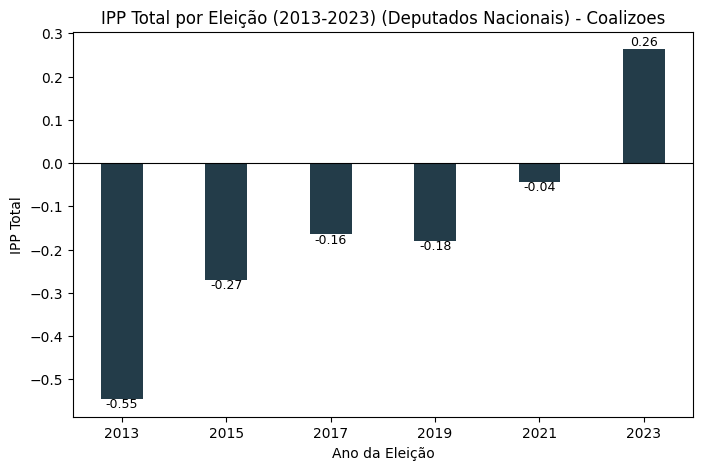

In [30]:
plt.figure(figsize=(8, 5))
plt.bar(anos, valores_deputados_coalizoes, color="#233C49")

plt.xlabel("Ano da Eleição")
plt.ylabel("IPP Total")
plt.title("IPP Total por Eleição (2013-2023) (Deputados Nacionais) - Coalizoes")
plt.axhline(0, color="black", linewidth=0.8)

plt.xticks(anos)

# Mostrar valores acima das barras
for i, v in enumerate(valores_deputados_coalizoes):
    if anos[i] in ipps_deputados:
        plt.text(anos[i], v + 0.01 if v >= 0 else v - 0.02, f"{v:.2f}", 
                ha="center", fontsize=9)

plt.show()

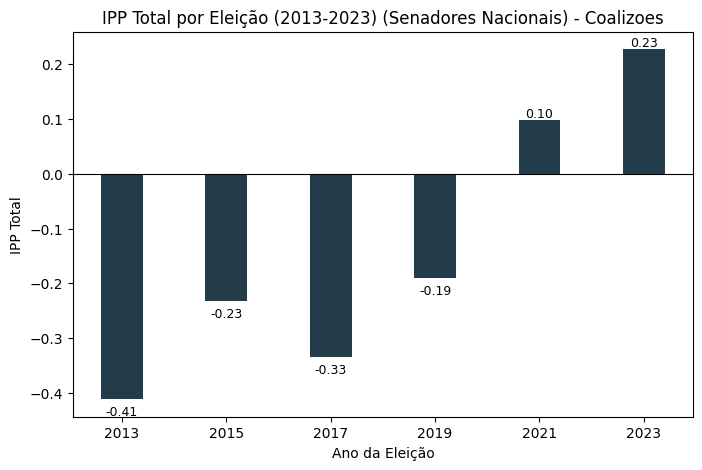

In [31]:
plt.figure(figsize=(8, 5))
plt.bar(anos, valores_senadores_coalizoes, color="#233C49")

plt.xlabel("Ano da Eleição")
plt.ylabel("IPP Total")
plt.title("IPP Total por Eleição (2013-2023) (Senadores Nacionais) - Coalizoes")
plt.axhline(0, color="black", linewidth=0.8)

plt.xticks(anos)

# Mostrar valores acima das barras
for i, v in enumerate(valores_senadores_coalizoes):
    if anos[i] in ipps_senadores:
        plt.text(anos[i], v + 0.005 if v >= 0 else v - 0.03, f"{v:.2f}", 
                ha="center", fontsize=9)

plt.show()